In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
import pandas as pd

plt.style.use(['science', 'bright'])
plt.rcParams['figure.dpi'] = 300

In [2]:
from src.simulation.utils import load_data

base_spectra, base_params = load_data("cosmologies")
realizations_spectra, realizations_params = load_data("realizations")
noise_spectra, noise_params = load_data("noise")

print(base_spectra.shape, base_params.shape) 
print(realizations_spectra.shape, realizations_params.shape) 
print(noise_spectra.shape, noise_params.shape) 

(300, 2401) (300, 6)
(15000, 2401) (15000, 6)
(15000, 2401) (15000, 6)


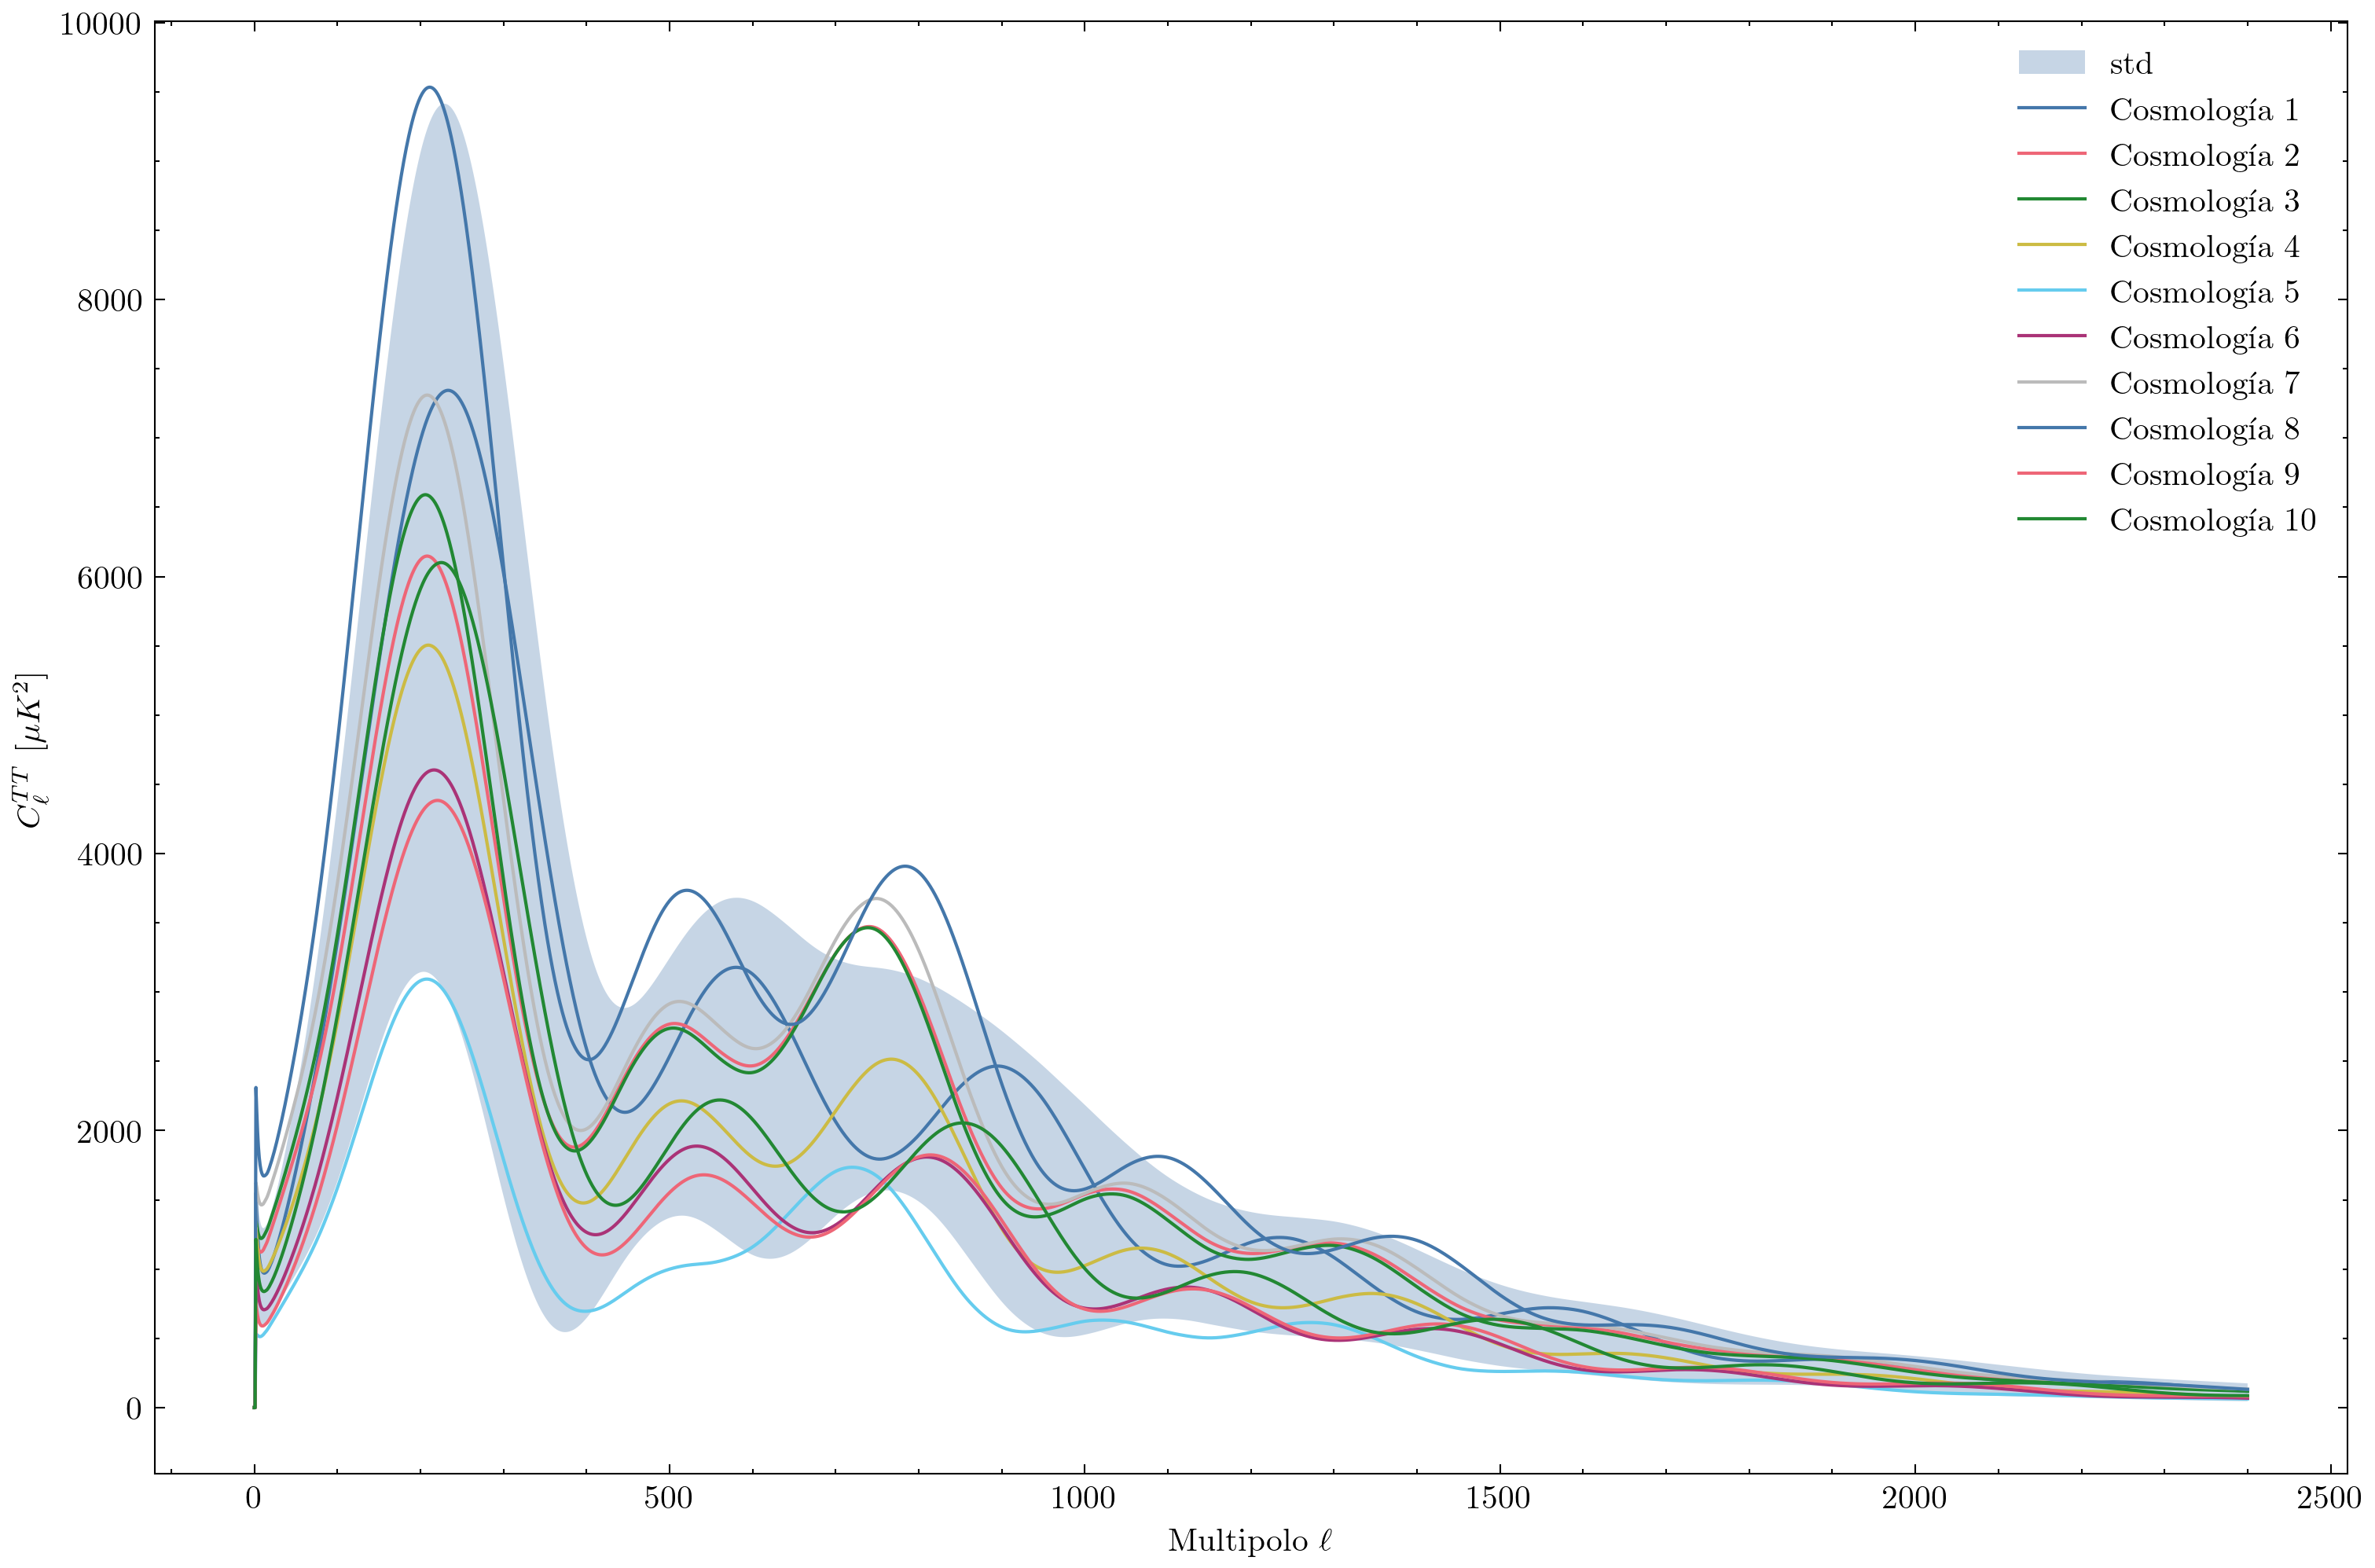

In [3]:
mean_Cl = np.mean(base_spectra, axis=0)
std_Cl = np.std(base_spectra, axis=0)

plt.figure(figsize=(12, 8))
plt.fill_between(range(len(mean_Cl)), mean_Cl - std_Cl, mean_Cl + std_Cl, alpha=0.3, label='std')
for i in range(10):  
    plt.plot(base_spectra[i, :], label=f'Cosmología {i+1}')
plt.xlabel('Multipolo $\ell$')
plt.ylabel('$C_\ell^{TT}$ [$\mu K^2$]')
plt.legend()
plt.show()

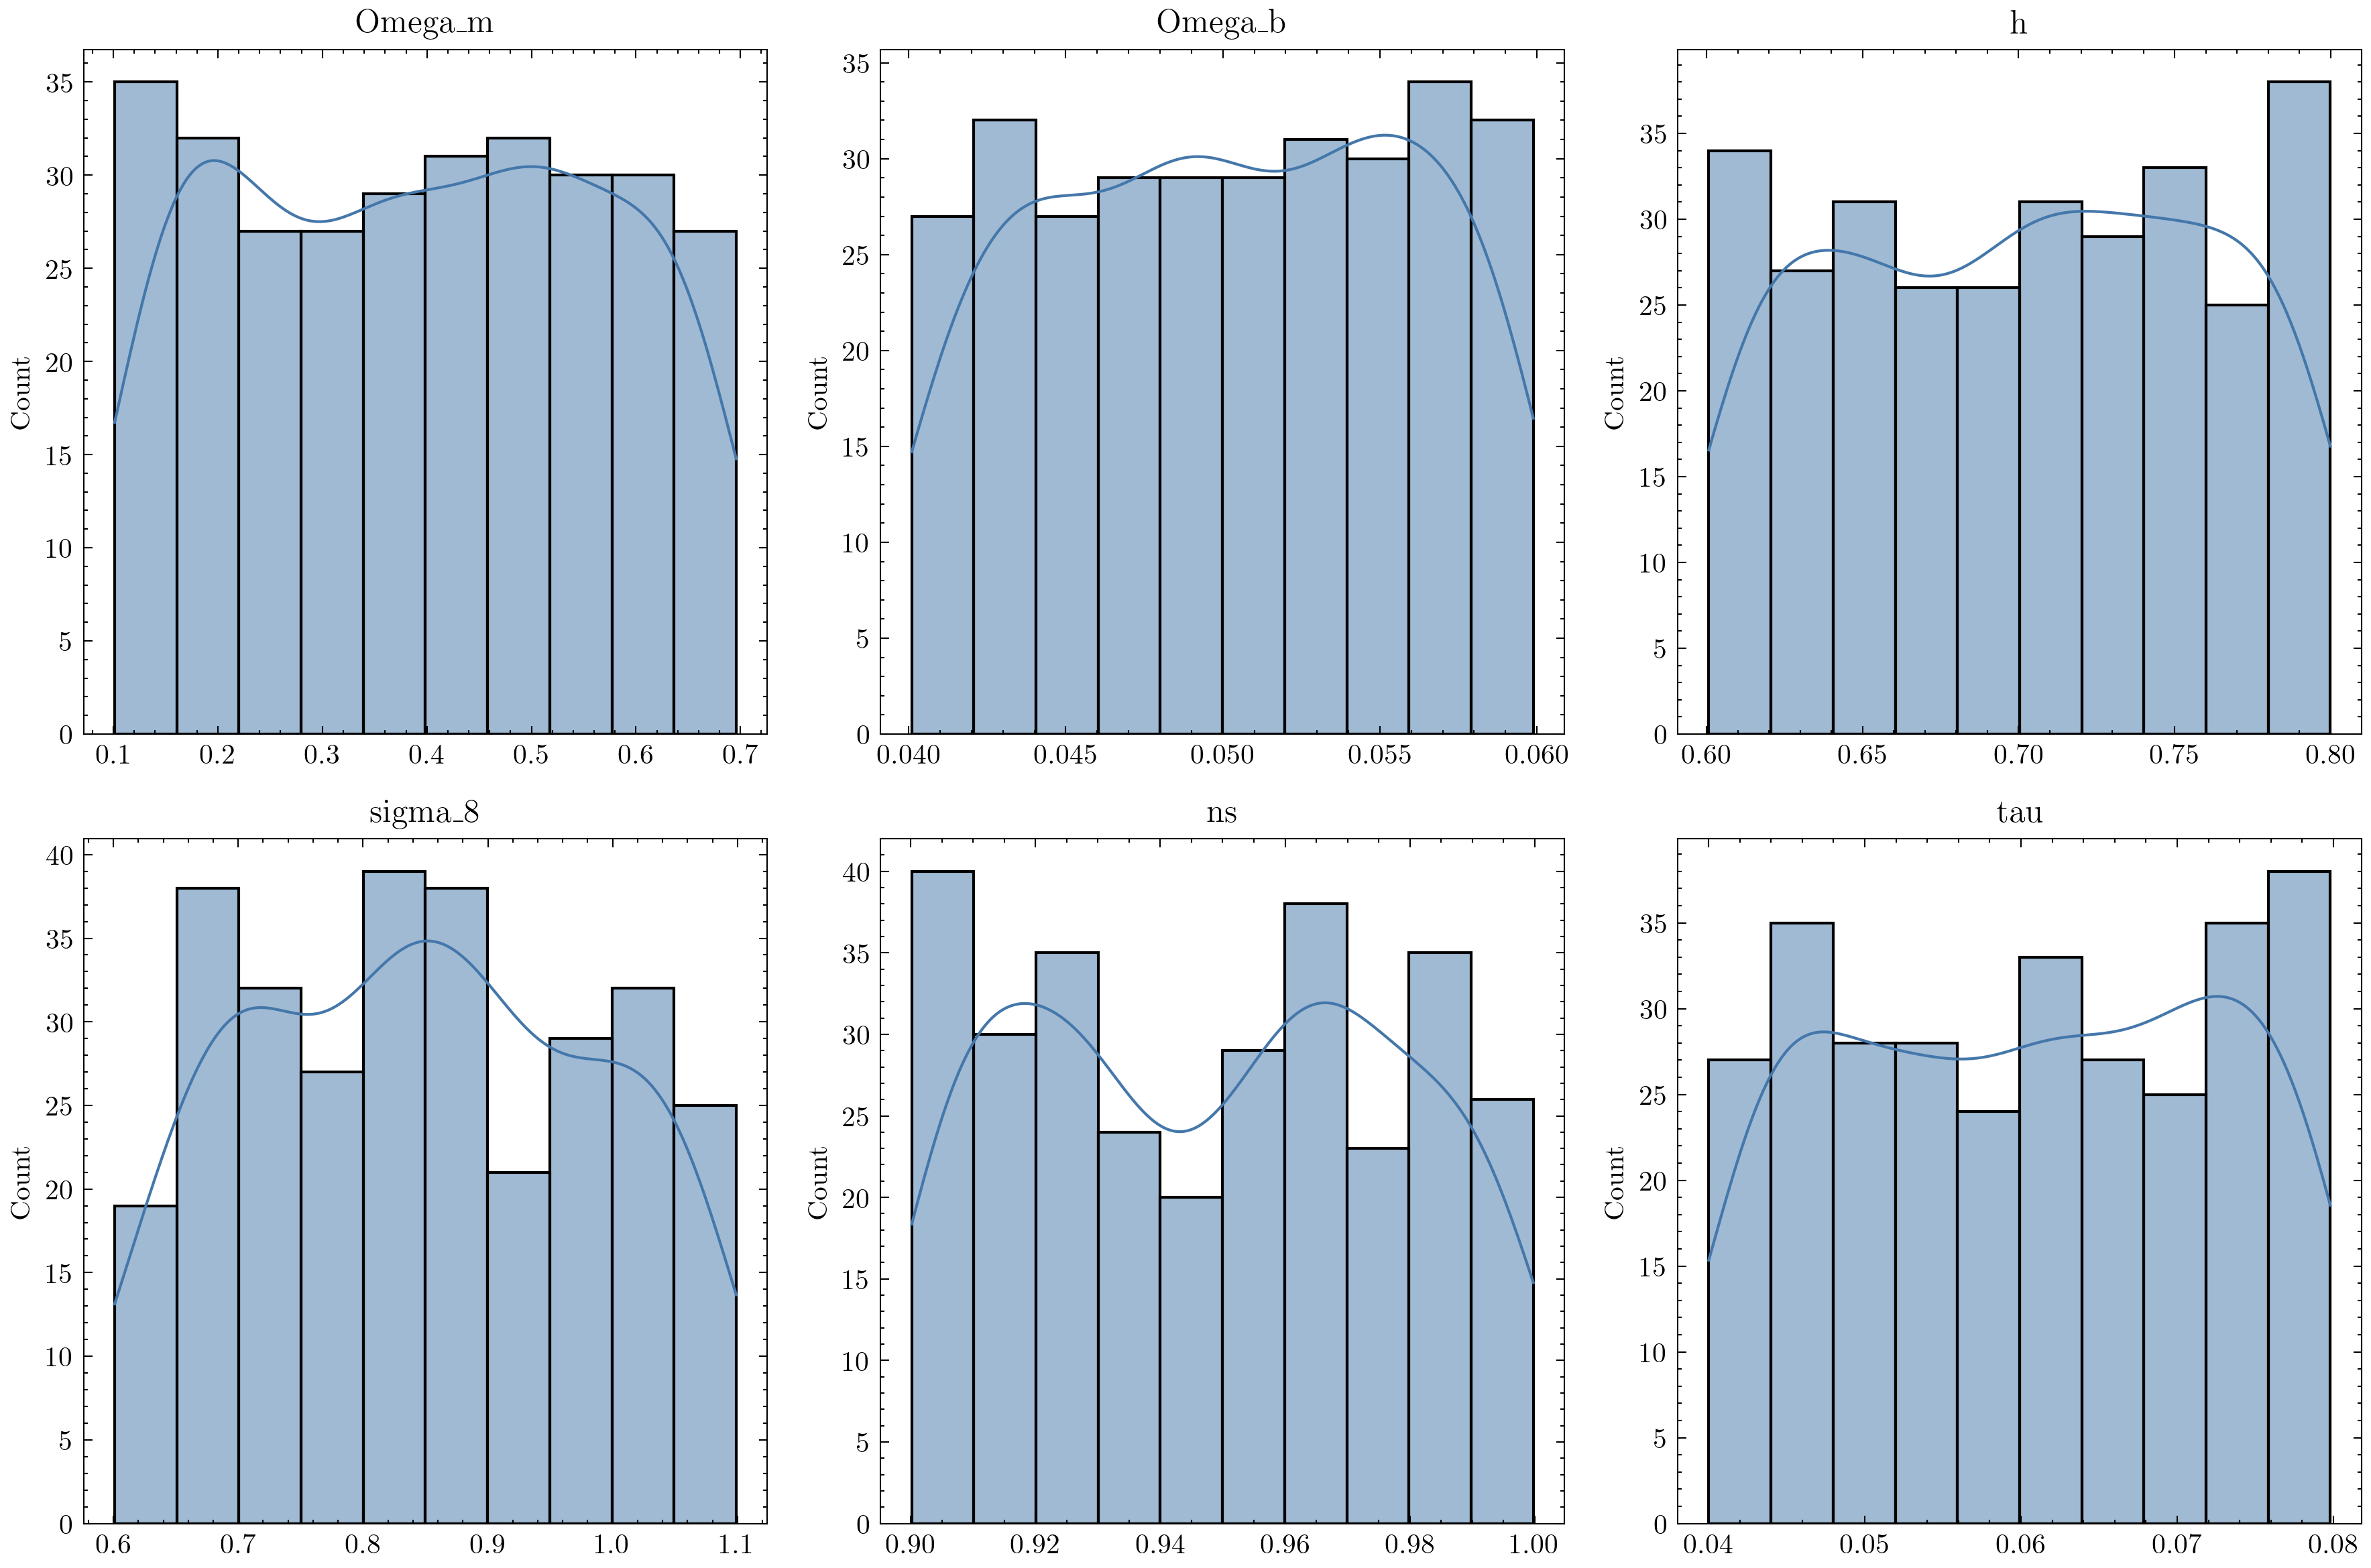

In [4]:
names = ["Omega_m", "Omega_b", "h", "sigma_8", "ns", "tau"]

plt.figure(figsize=(12, 8))
for i in range(base_params.shape[1]):
    plt.subplot(2, 3, i+1)
    sns.histplot(base_params[:, i], kde=True)
    plt.title(f"{names[i]}")
plt.tight_layout()
plt.show()

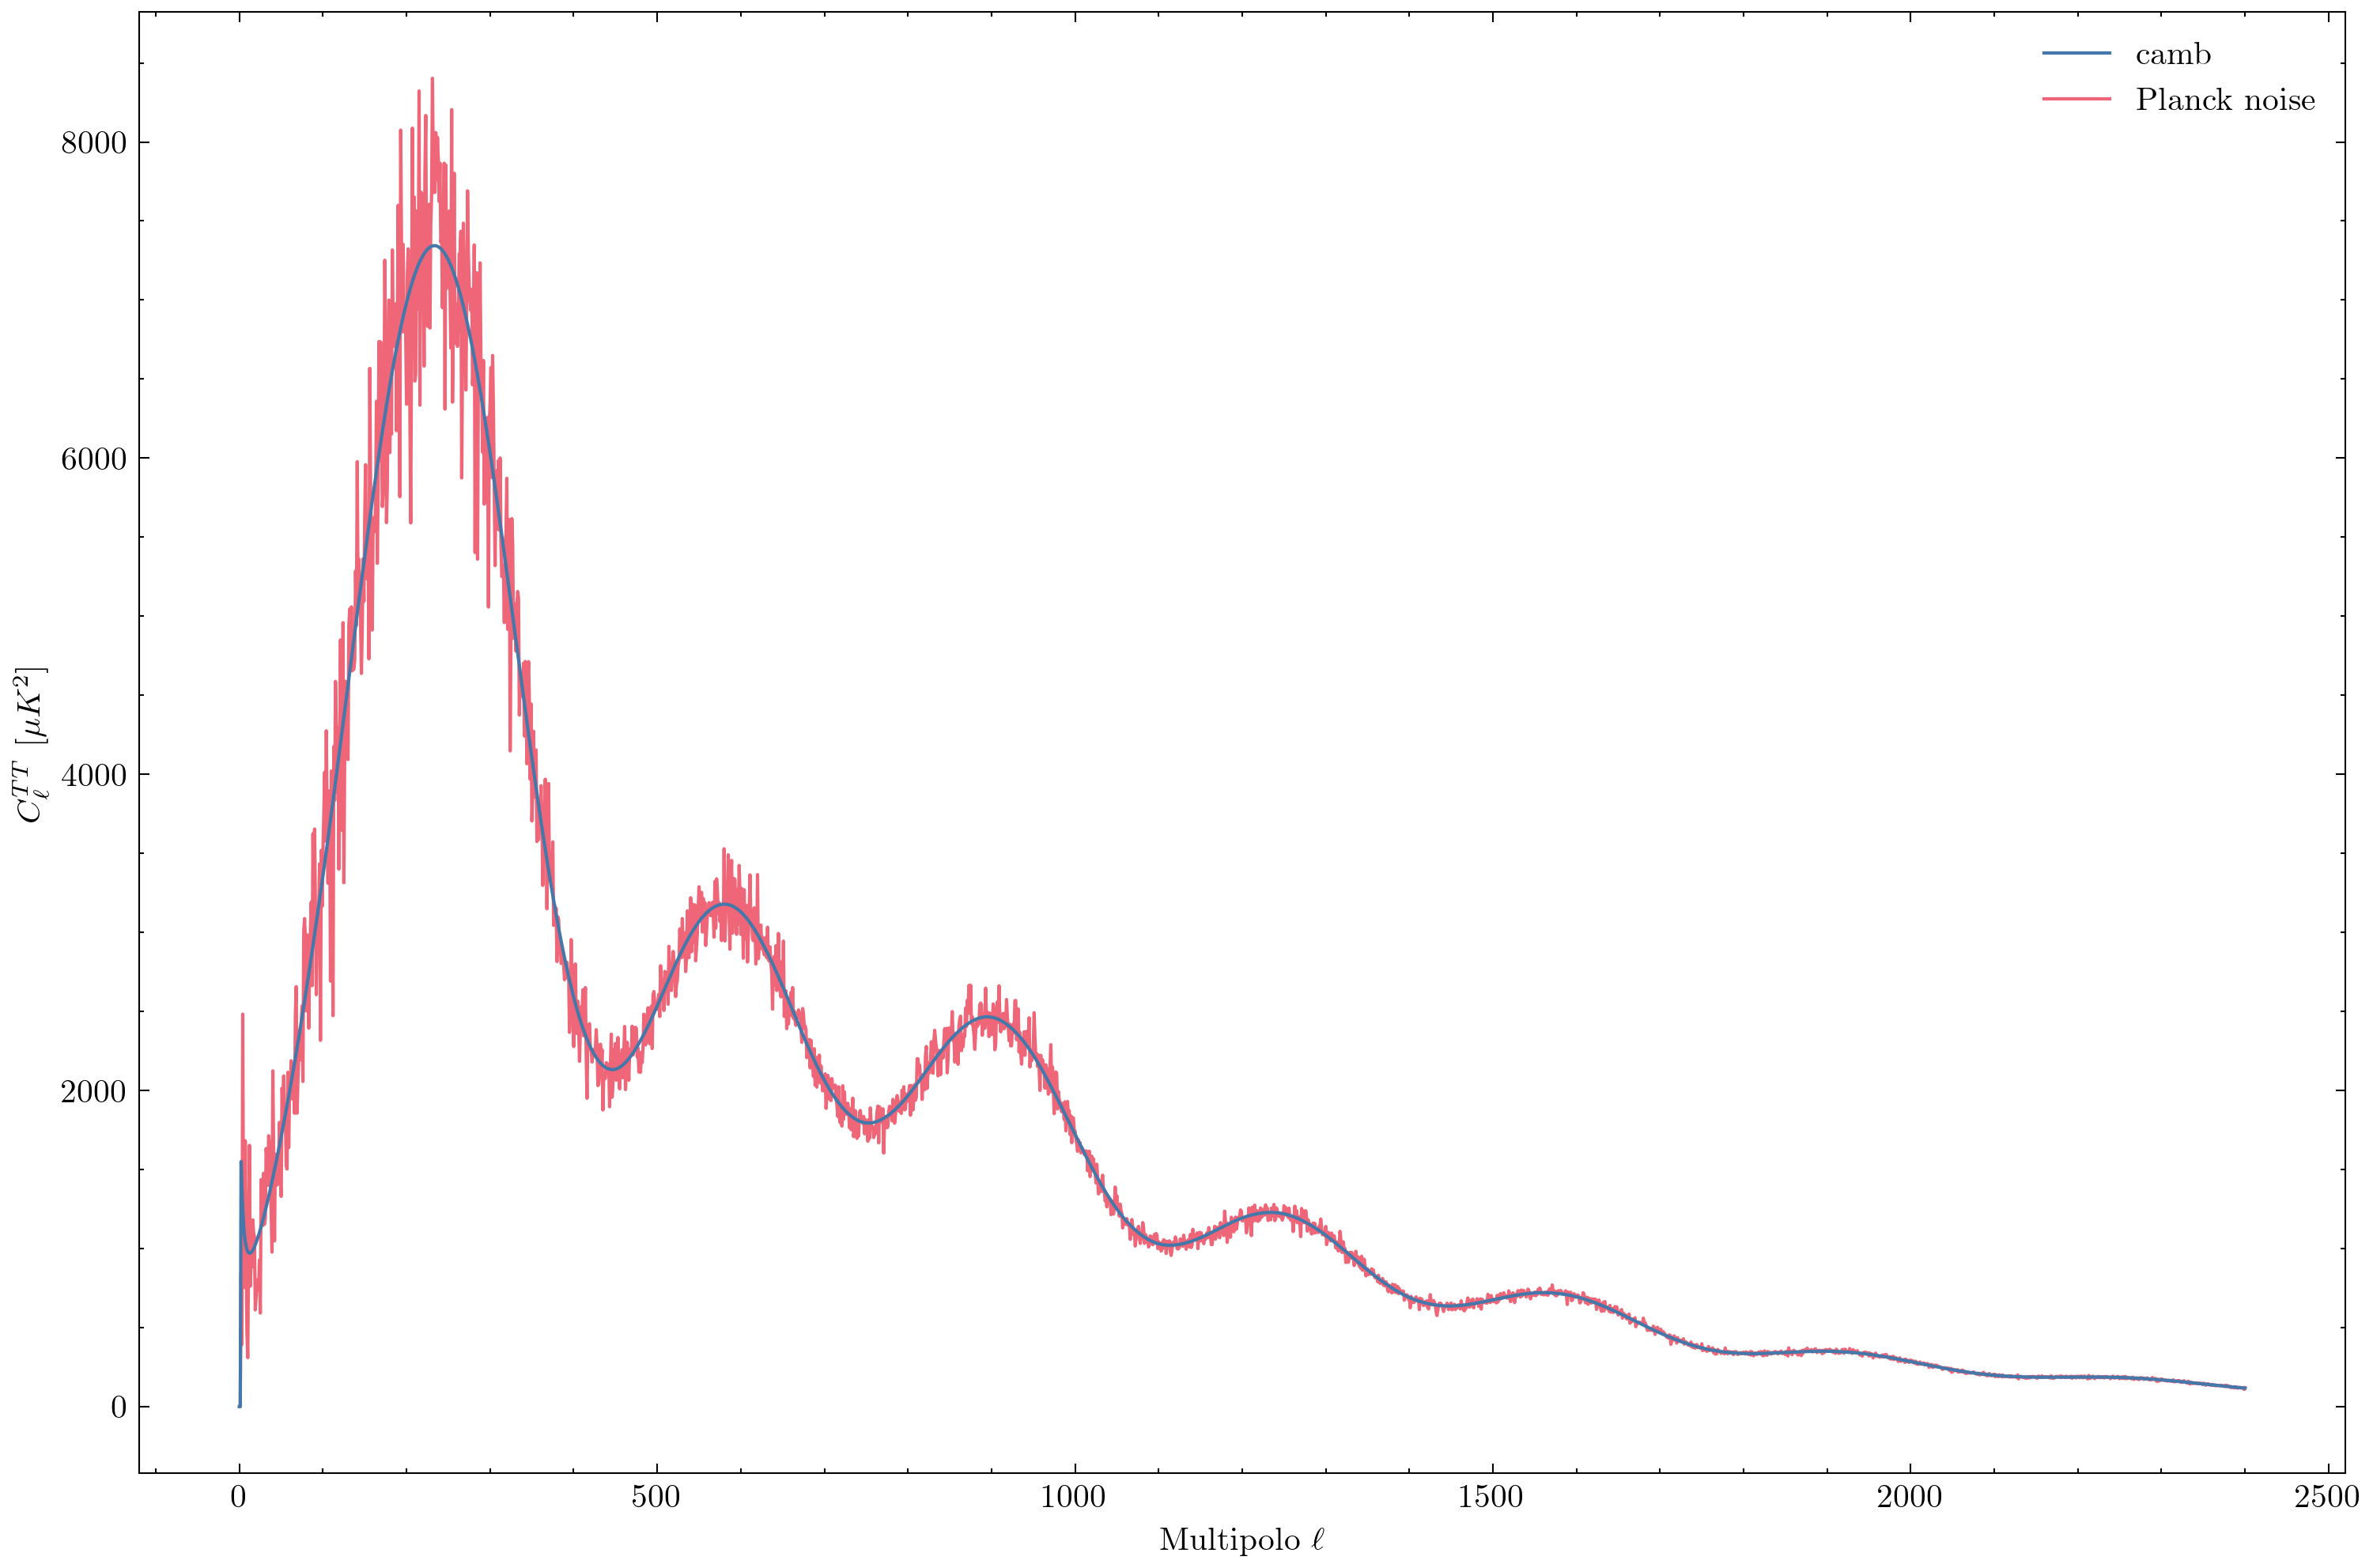

In [5]:
plt.figure(figsize=(12, 8))
plt.plot(realizations_spectra[0, :], label=f'camb', zorder=2)
plt.plot(noise_spectra[0, :], label=f'Planck noise', zorder=1)
plt.xlabel('Multipolo $\ell$')
plt.ylabel('$C_\ell^{TT}$ [$\mu K^2$]')
plt.legend()
plt.show()

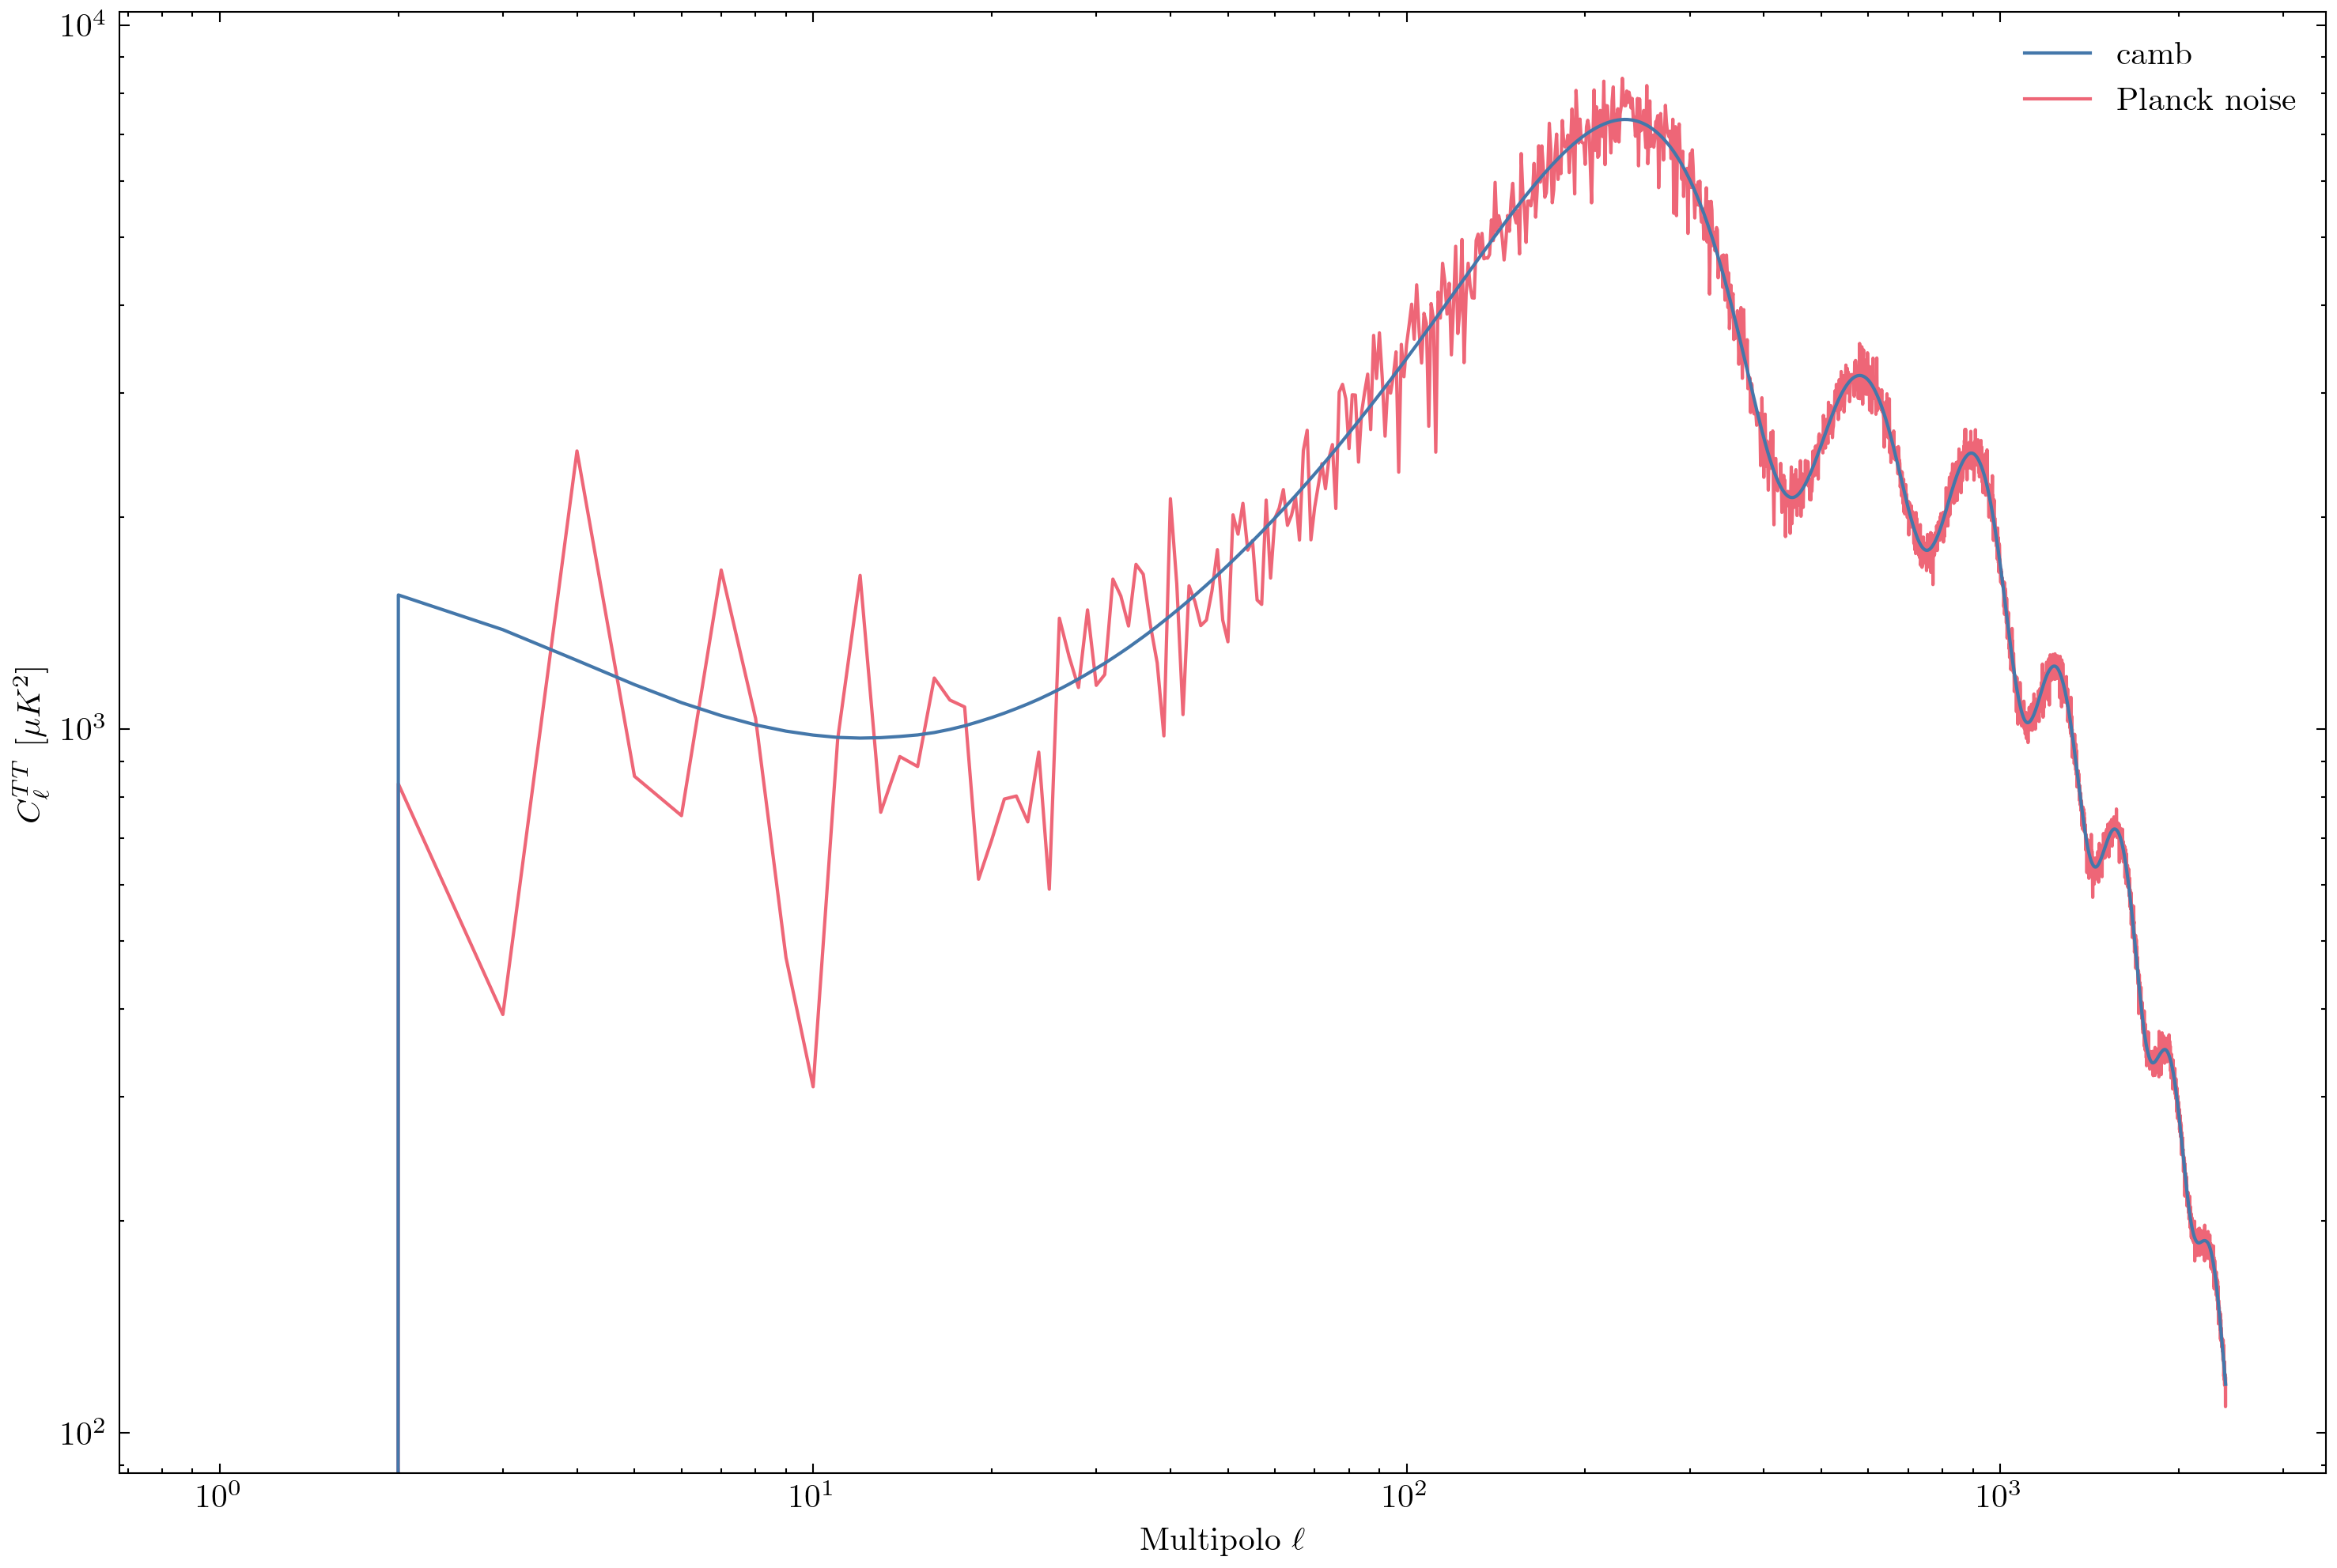

In [6]:
plt.figure(figsize=(12, 8))
plt.loglog(realizations_spectra[0, :], label=f'camb', zorder=2)
plt.loglog(noise_spectra[0, :], label=f'Planck noise', zorder=1)
plt.xlabel('Multipolo $\ell$')
plt.ylabel('$C_\ell^{TT}$ [$\mu K^2$]')
plt.legend()
plt.show()

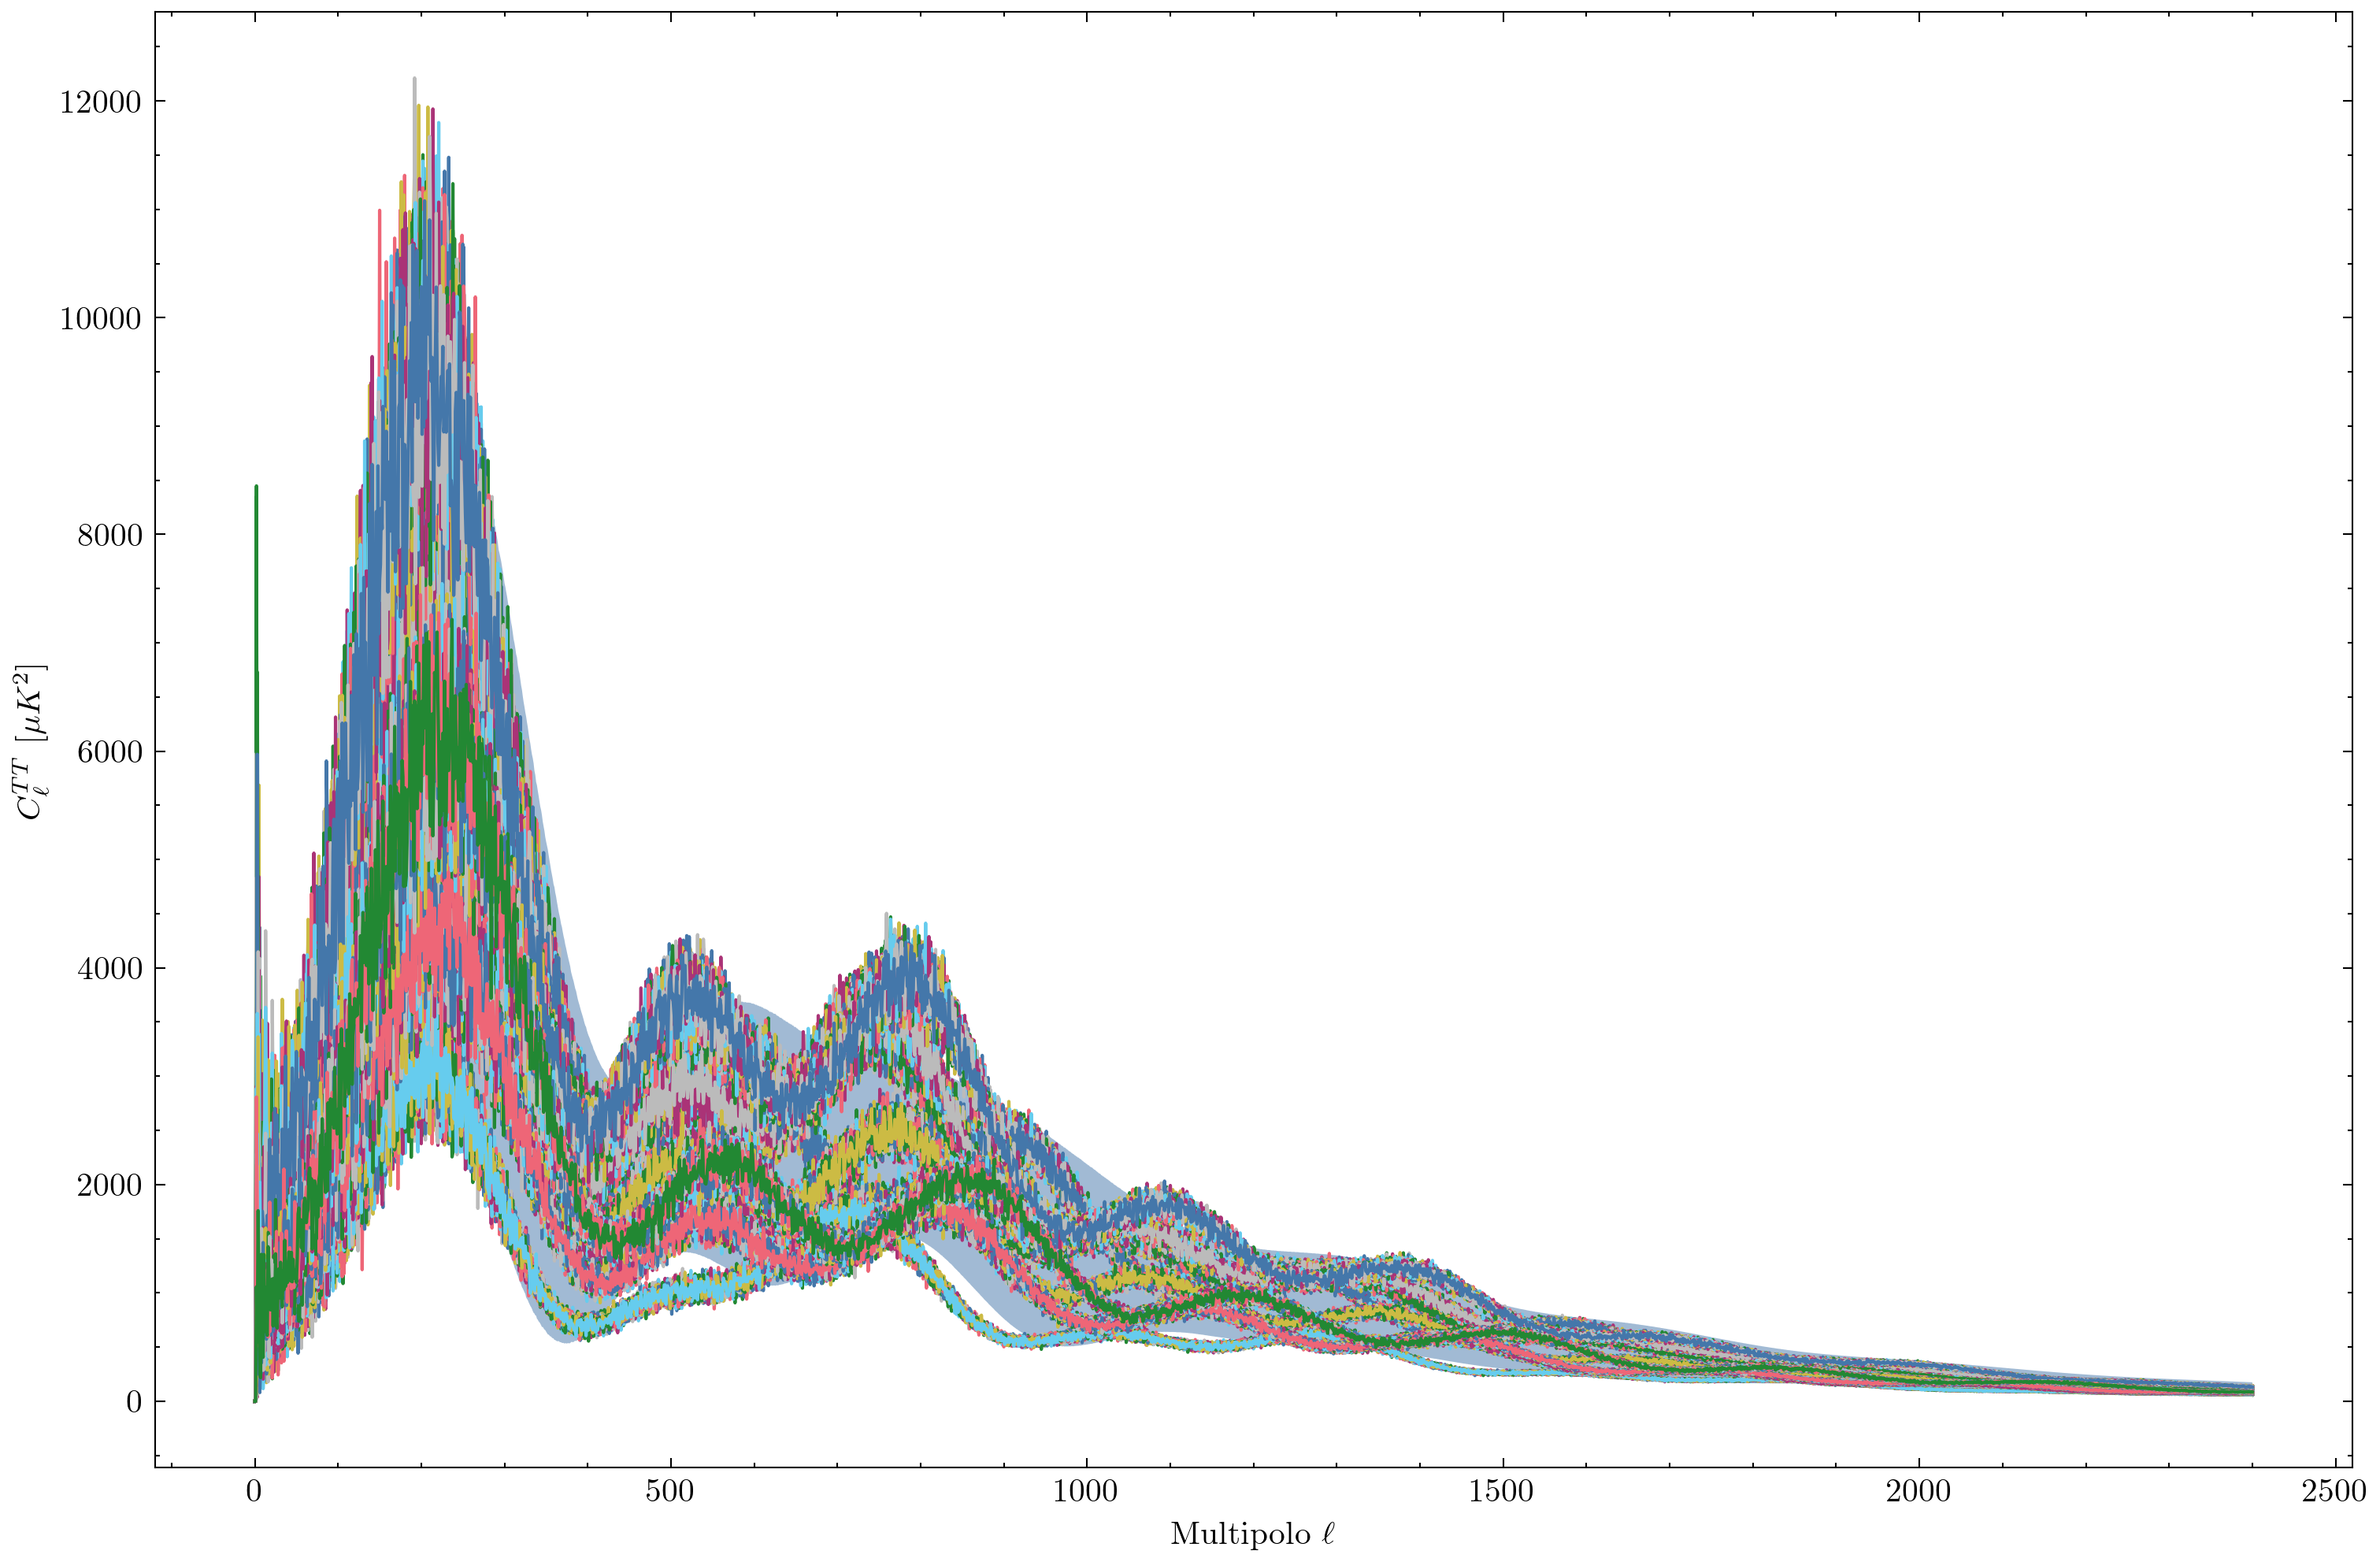

In [7]:
mean_Cl = np.mean(noise_spectra, axis=0)
std_Cl = np.std(noise_spectra, axis=0)

plt.figure(figsize=(12, 8))
plt.fill_between(range(len(mean_Cl)), mean_Cl[:] - std_Cl[:], mean_Cl[:] + std_Cl[:], alpha=0.5, label='std')
for i in range(500):  
    plt.plot(noise_spectra[i, :], label=f'Realización {i+1}')
plt.xlabel('Multipolo $\ell$')
plt.ylabel('$C_\ell^{TT}$ [$\mu K^2$]')
plt.show()